<a href="https://colab.research.google.com/github/michaelige1/data-mining-project/blob/main/CourseProject_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

importing the dataset

In [3]:
url_train = 'https://raw.githubusercontent.com/michaelige1/data-mining-project/main/train.csv'
url_test = 'https://raw.githubusercontent.com/michaelige1/data-mining-project/main/test.csv'

df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Preprocessing Data

In [ ]:
#removing name
df_train.pop("Name")
df_train.pop("PassengerId")
df_test.pop("Name")
df_test.pop("PassengerId")
#Handling Missing Values
df_train.dtypes

imputer_col = ['Age', 'RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
imp = SimpleImputer(strategy="mean")
imp.fit(df_train[imputer_col])
imp.fit(df_test[imputer_col])
df_train[imputer_col] = imp.transform(df_train[imputer_col])
df_test[imputer_col] = imp.transform(df_test[imputer_col])
df_train["HomePlanet"].fillna('X', inplace=True)
df_test["HomePlanet"].fillna('X', inplace=True)

#Identifying unique values
df_train['HomePlanet'].unique() #3 and nan

#Encoding the Categorical Variables
cat_var = ["HomePlanet",  "Destination", "Cabin"]
catvar2 = ["CryoSleep", "VIP"]
for i in cat_var:
  df_train.pop(i)
  df_test.pop(i)
for col in catvar2:
  df_train[col] = df_train[col].astype(str)
  df_test[col] = df_test[col].astype(str)
  df_train[col] = preprocessing.LabelEncoder().fit_transform(df_train[col])
  df_test[col] = preprocessing.LabelEncoder().fit_transform(df_test[col])

df_train["Transported"] = df_train["Transported"].astype(bool)
df_train["Transported"] = preprocessing.LabelEncoder().fit_transform(df_train["Transported"])


df_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1


Logistic Regression

In [ ]:
class LogisticRegression: 
  def __init__(self, learn_rate=0.001, num_iters=1000):
    self.learn_rate = learn_rate
    self.num_iters = num_iters
    self.weights = None
    self.bias = None
  
  def fit(self, X, y):
    num_instances, num_features = X.shape
    self.weights = np.zeros(num_features, dtype=float)
    self.bias = 0
    #gradient descent
    for n in range(self.num_iters):
      model = 1 / (1 + np.exp(-(np.matmul(X, self.weights)) + self.bias))
      
      tmp = (model - y.T)
      tmp = np.reshape(tmp, num_instances)
      dw = np.matmul(X.transpose(), tmp)/num_instances
      db = np.sum(tmp)/num_instances

      self.weights -= self.learn_rate * dw
      self.bias -= self.learn_rate * db
  
  def predict(self, X):
    model = 1 / (1 + np.exp(-(np.matmul(X, self.weights)) + self.bias))
    y_predcls = [1 if i > 0.5 else 0 for i in model]
    return y_predcls

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))
    

Training the model

In [ ]:
X = (df_train.iloc[:, :-1]).astype(float)
X = X.values
y = (df_train.iloc[:, -1:]).astype(float)
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state = 0)



#accuracy score function
def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

regressor = LogisticRegression(learn_rate=0.0001, num_iters = 1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
predictions = pd.DataFrame(predictions)
y_test = pd.DataFrame(y_test)

print(accuracy(y_test, predictions))



0    0.65942
dtype: float64


Graphs

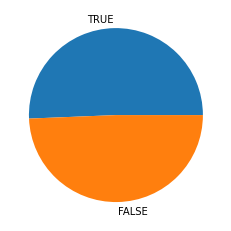

In [4]:
import matplotlib.pyplot as plt

z = np.array([2166, 2111])

plt.pie(z, labels=["TRUE", "FALSE"])
plt.show()